<a href="https://colab.research.google.com/github/rvbittencourt07/Phyton_Data_science/blob/main/refinando_visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
tmdb = pd.read_csv('/content/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'Total']
contagem_de_lingua

,original_language,Total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


<Axes: xlabel='original_language', ylabel='Total'>

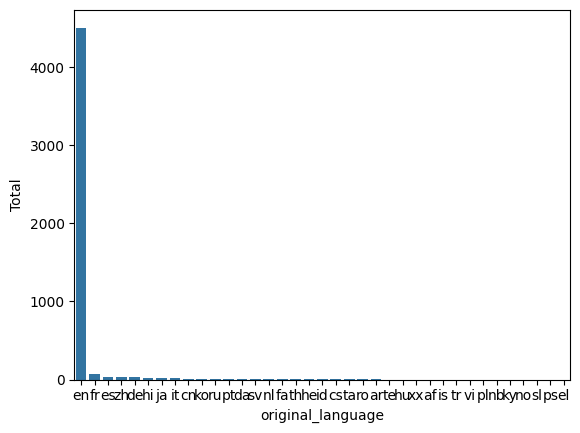

In [ ]:
import seaborn as sns
sns.barplot(data = contagem_de_lingua, x="original_language",y="Total")

<Axes: xlabel='original_language', ylabel='count'>

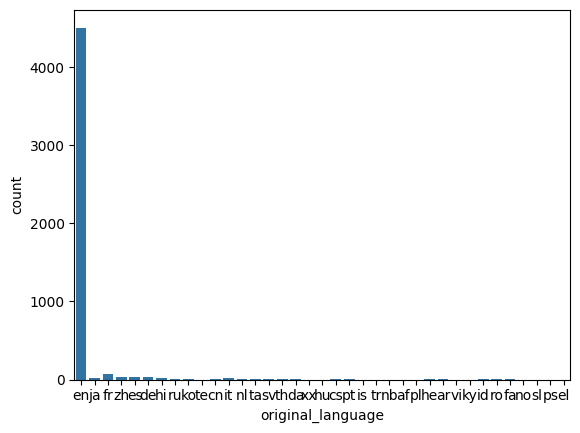

In [ ]:
sns.countplot(data = tmdb, x = "original_language")

<Axes: ylabel='Total'>

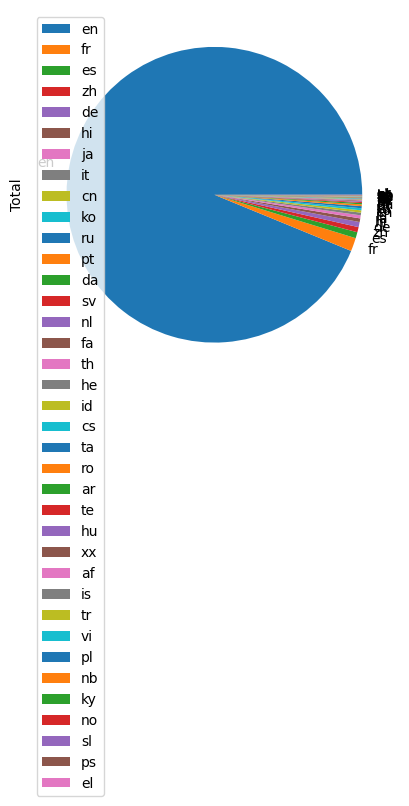

In [ ]:
#péssimo
contagem_de_lingua.plot(kind = "pie",y="Total", labels=contagem_de_lingua["original_language"])

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [ ]:
dados = {
  "lingua" : ["ingles","outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


from matplotlib import pyplot as plt
dados['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('lingua').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dados['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dados['lingua'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dados, x='total', y='lingua', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='lingua', ylabel='total'>

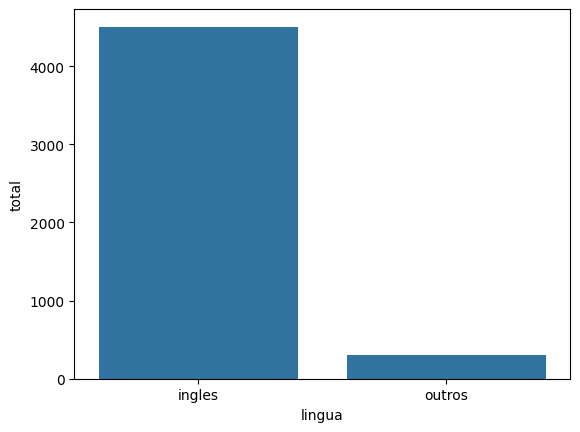

In [ ]:
sns.barplot(data = dados, x="lingua",y="total")

In [ ]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


<Axes: xlabel='original_language', ylabel='count'>

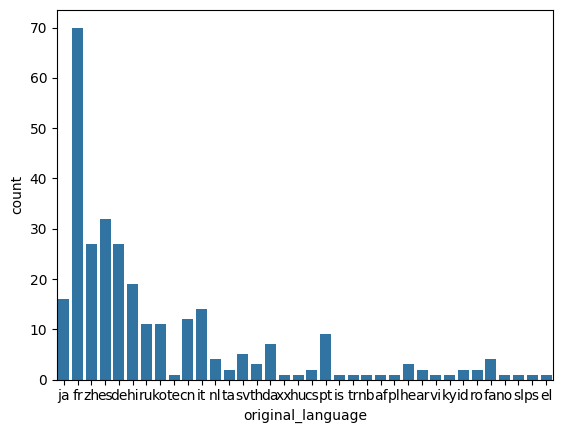

In [ ]:
sns.countplot(data = tmdb.query("original_language != 'en'"), x = "original_language")

<Axes: ylabel='total'>

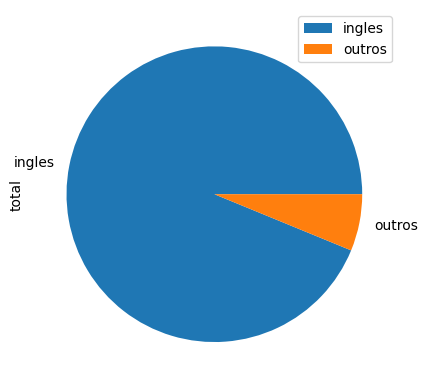

In [ ]:
dados = {
  "lingua" : ["ingles","outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados.plot(kind= "pie",y="total",x="lingua", labels = dados["lingua"])

<Axes: xlabel='original_language', ylabel='count'>

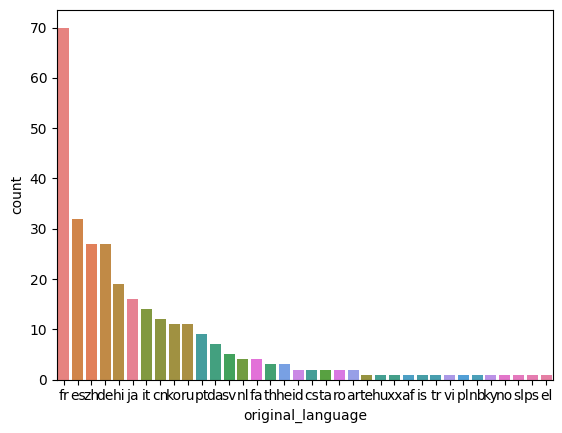

In [34]:
sns.countplot(data = tmdb.query("original_language != 'en'"),
              order = total_de_outros_filmes_por_lingua.index,
              hue = "original_language",
              x = "original_language")

In [35]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

Text(0.5, 1.0, 'Distribuição percentual de filmes por lingua (sem ingles)')

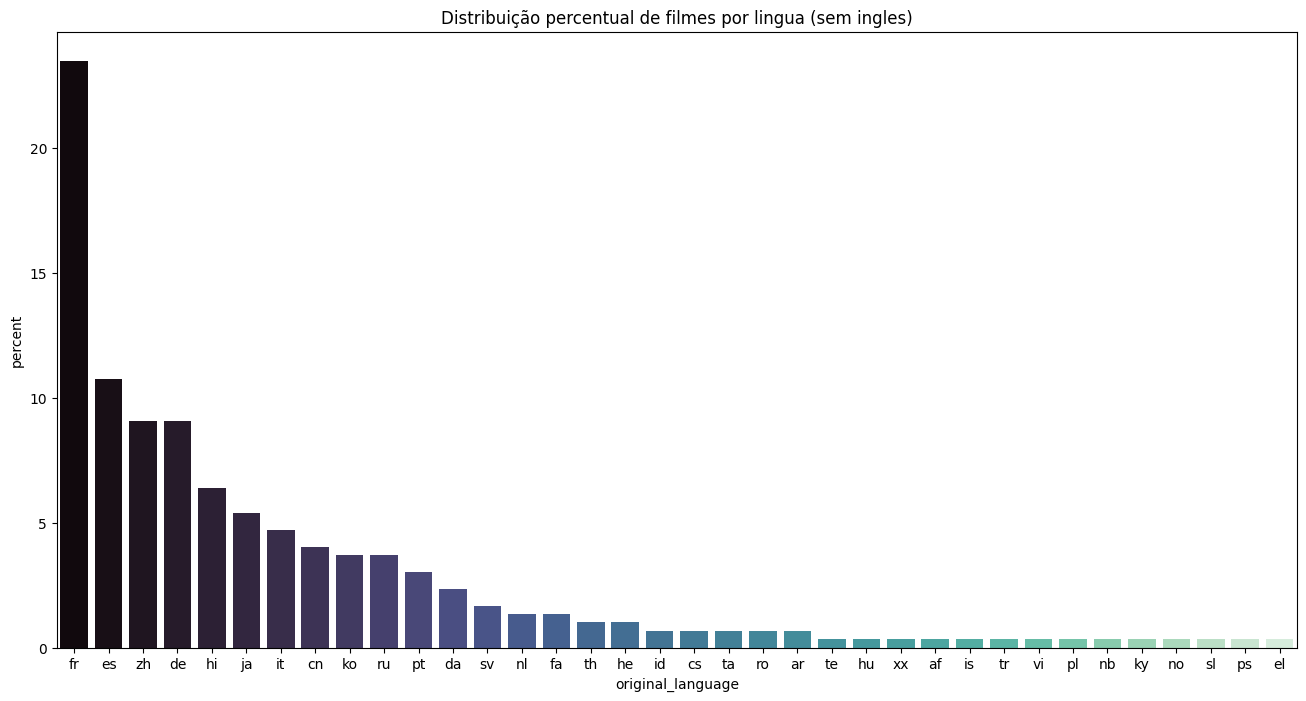

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(data = tmdb.query("original_language != 'en'"),
              order = total_de_outros_filmes_por_lingua.index,
              hue = "original_language",
              palette = "mako",
              hue_order = total_de_outros_filmes_por_lingua.index,
              stat = "percent",
              x = "original_language")
plt.title("Distribuição percentual de filmes por lingua (sem ingles)")

In [46]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [44]:

filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
notas_do_toy_story = notas.query("filmeId == 1")["nota"]
notas_do_jumanji = notas.query("filmeId == 2")["nota"]

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_jumanji, media_do_toy_story)

3.4318181818181817 3.9209302325581397


/tmp/ipython-input-1575166547.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([notas_do_toy_story, notas_do_jumanji], labels = ["Toy Story", "Jumanji"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7c2420937b30>,
 'caps': [<matplotlib.lines.Line2D at 0x7c24206821e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c2420718d10>,
 'medians': [<matplotlib.lines.Line2D at 0x7c24206d5490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c24206d4740>,
 'means': []}

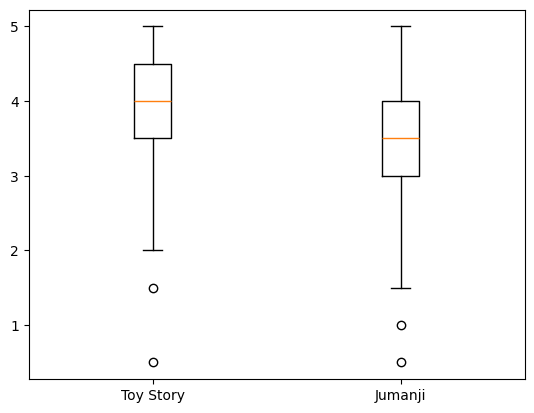

In [48]:
import numpy as np

plt.boxplot([notas_do_toy_story, notas_do_jumanji], labels = ["Toy Story", "Jumanji"])

<Axes: xlabel='filmeId', ylabel='nota'>

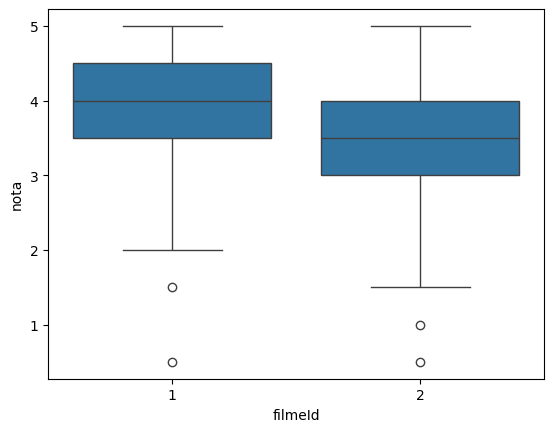

In [51]:
sns.boxplot(data = notas.query("filmeId in [1,2]"),
            x = "filmeId",
            y = "nota")

In [53]:
notas.groupby("filmeId").count().query("nota == 1")

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
